<a href="https://colab.research.google.com/github/Bustagar/APRENDIZAJE-AUTOMATICO-1/blob/main/TP4_regresion_lineal_%2B_MLP(Resuelto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 AA1

Juan Sebastian Bustamante Garcia

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

Dataset utilizado es "Wine Quality" sacado del siguiente link: https://archive.ics.uci.edu/dataset/186/wine+quality


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Carga de dataset
url = 'https://raw.githubusercontent.com/Bustagar/APRENDIZAJE-AUTOMATICO-1/main/winequality-red.csv'

df = pd.read_csv(url, sep=';')
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.9994,3.47,0.53,9.9,5
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.9972,3.37,0.77,10.7,6
410,9.0,0.430,0.34,2.5,0.080,26.0,86.0,0.9987,3.38,0.62,9.5,6
720,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.9976,3.22,0.44,9.6,5
1065,7.7,0.610,0.18,2.4,0.083,6.0,20.0,0.9963,3.29,0.60,10.2,6


### 2.1 Renombramos las columnas al español para mejor entendimiento

In [83]:
df.rename({'fixed acidity': 'acidez fija',
           'volatile acidity': 'acido volatil',
           'citric acid': 'acido citrico',
           'residual sugar': 'azucar residual',
           'chlorides': 'cloruros',
           'free sulfur dioxide': 'dioxido de azufre libre',
           'total sulfur dioxide': 'dioxido de azufre total',
           'density': 'densidad',
           'pH': 'pH',
           'sulphates': 'sulfatos',
           'alcohol': 'alcohol',
           'quality': 'calidad'}, axis=1, inplace=True)

In [84]:
df.sample(5)

,acidez fija,acido volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
890,7.2,0.340,0.24,2.0,0.071,30.0,52.0,0.99576,3.44,0.58,10.1,5
282,7.6,0.520,0.12,3.0,0.067,12.0,53.0,0.99710,3.36,0.57,9.1,5
267,7.9,0.350,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
633,10.1,0.935,0.22,3.4,0.105,11.0,86.0,1.00100,3.43,0.64,11.3,4
307,10.3,0.410,0.42,2.4,0.213,6.0,14.0,0.99940,3.19,0.62,9.5,6


### 2.2 Descripción del dataframe

In [85]:
df.describe()

,acidez fija,acido volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Media: La calidad promedio de los vino es de 5.6, lo que indica que la mayoria de los vinos tiene una calidad moderada

Distribución: La distribución de la calidad varia entre los 3 y 8 puntos, donde la mayoria de los valor se agrupan enter 5 y 6, teniendo una variación estandar de 0.8, también se observa que los datos pueden estar sesgados a valores iguales o menores 6 ya que el tercer cuartil tambien es 6.

### 2.3 Gráfico boxplot para verificacion de outliers

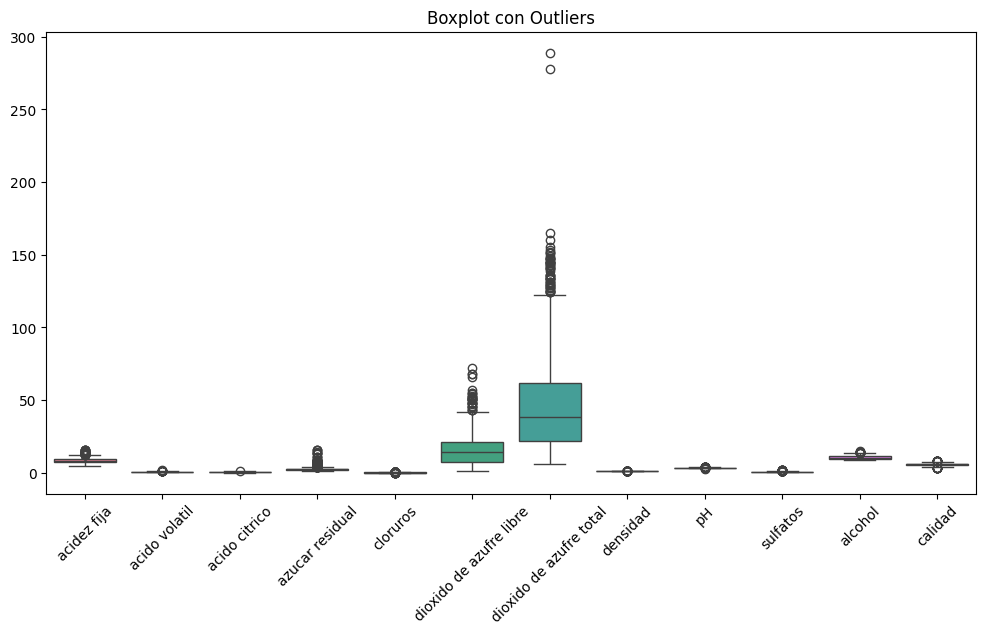

In [86]:
# Crear el boxplot con valores atípicos visibles
plt.figure(figsize=(12,6))
sns.boxplot(data=df, showfliers=True)  # showfliers=True muestra los outliers

# Mostrar gráfico
plt.title("Boxplot con Outliers")
plt.xticks(rotation=45)
plt.show()


Se ve la cantidad de outliers que sobre salen de los bigotes del boxplot y es causado por las diferentes escalas de medición que tiene cada columna, pero se observan a simple vista 2 valores atípico en la columan "Dioxido de azufre total" que podrían intereferir en la presición del modelo

### 2.4 gráfico de dispersión con Scatterplots

In [87]:
# Definir las features y el target
features = ['acido volatil', 'acido citrico', 'azucar residual', 'cloruros', 'dioxido de azufre libre',
            'dioxido de azufre total', 'densidad', 'pH', 'sulfatos', 'alcohol']
target = 'calidad'

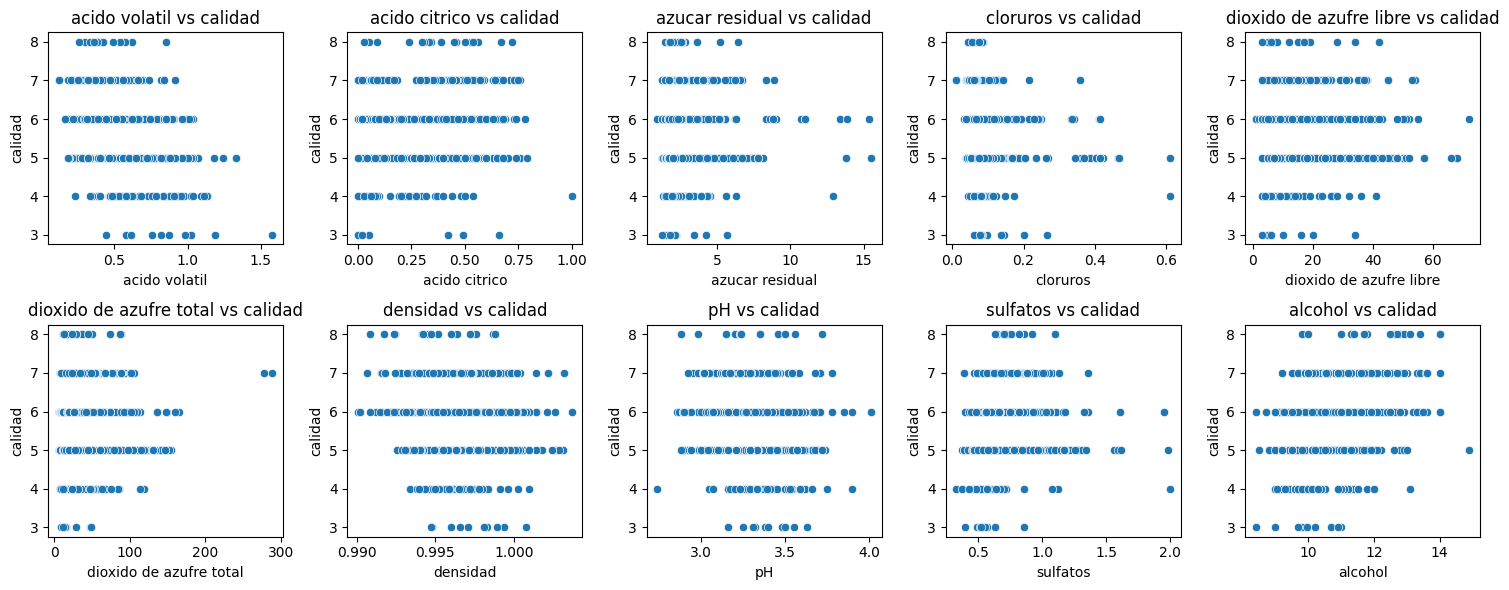

In [88]:
# Crear una figura con subgráficos
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,6))  # Ajusta según la cantidad de variables

# Iterar sobre cada feature y graficarla
for i, feature in enumerate(features):
    row = i // 5  # Fila en la matriz de subgráficos
    col = i % 5   # Columna en la matriz de subgráficos
    sns.scatterplot(x=df[feature], y=df[target], ax=axes[row, col])
    axes[row, col].set_title(f"{feature} vs {target}")

plt.tight_layout()  # Ajustar espacio entre gráficos
plt.show()

Se observa lo siguiente en cada gráfico que el bajo contenido de ciertas sustancian mejoran la calidad del vino como, acido volatil, acido citrico, azucar residual, cloruros, dioxido de azufre libre, dioxido de azufre total y sulfatos.
Tambien se observa que una densidad entre 0.995 y 1.000 aumenta la calidad, al igual que el ph entre 3.0 y 3.5 influye considerablemente en la calidad del vino y por ultimo se observa que el alcohol entre 11 y 14 es el nivel optimo para una buena calidad de vino.



### 2.5 Verificación de correlación

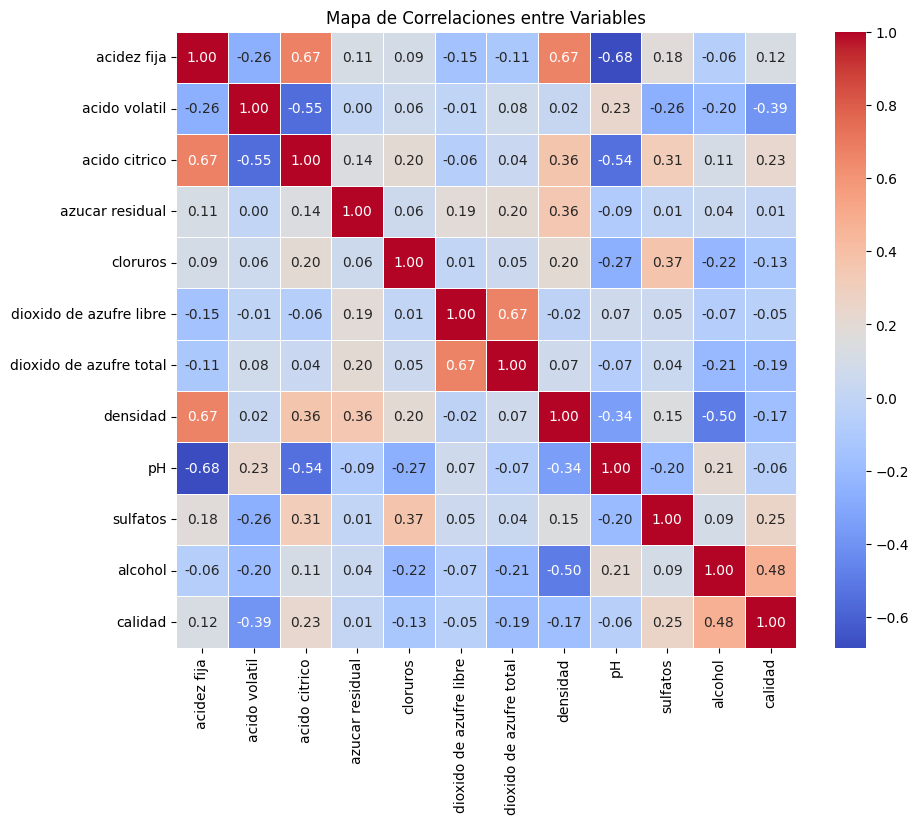

In [89]:
# Calcular la matriz de correlación
correlacion = df.corr()

# Crear el heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Mapa de Correlaciones entre Variables")
plt.show()

In [90]:
# Correlacion segun la calidad del vino
componentes_principales = correlacion['calidad'].sort_values(ascending=False)[1:]
print("Características más importantes para la calidad del vino:")
print(componentes_principales)

Características más importantes para la calidad del vino:
alcohol                    0.476166
sulfatos                   0.251397
acido citrico              0.226373
acidez fija                0.124052
azucar residual            0.013732
dioxido de azufre libre   -0.050656
pH                        -0.057731
cloruros                  -0.128907
densidad                  -0.174919
dioxido de azufre total   -0.185100
acido volatil             -0.390558
Name: calidad, dtype: float64


Se observa que los componentes que mas influyen en la calidad del vino es el alcohol, lo sulfatos y el acido citrico.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

### **3.1. Limpieza: Missing values**

In [91]:
# Mostrar la cantidad de valores nulos por columna
valores_nulos = df.isnull().sum()

# Imprimir resultados
print("Cantidad de valores nulos por columna:")
print(valores_nulos)

Cantidad de valores nulos por columna:
acidez fija                0
acido volatil              0
acido citrico              0
azucar residual            0
cloruros                   0
dioxido de azufre libre    0
dioxido de azufre total    0
densidad                   0
pH                         0
sulfatos                   0
alcohol                    0
calidad                    0
dtype: int64


No hay valores nulos en el dataframe.

### **3.3. Variables categórica**

El dataframe no contiene variables categóricas

### **3.2. Limpieza: Features**

No se descarta ninguna features, ya que al ser todos componentes que influyen en la calidad del vino el quitar ahora uno sin analizarlo previamente podria influir en los resultados del modelo, restandole presición.

### **3.4. Escalado de features aplizando Z-Score**

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
# Seleccionar las columnas a escalar (excluyendo la variable objetivo)
features = df.drop(columns=["calidad"])

# Aplicar StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convertir de nuevo a DataFrame para mejor visualización
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Agregar la columna de calidad nuevamente
df_scaled["calidad"] = df["calidad"]

# Ver las primeras filas escaladas
df_scaled.sample(5)

,acidez fija,acido volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
1310,-0.470907,0.459094,-0.056360,-0.453218,-0.307468,0.777007,1.262952,-0.332149,-0.072005,-0.756246,-0.584777,5
260,-0.241094,-1.105120,-0.210412,-0.595114,-0.222453,0.203223,-0.044634,-0.263247,-0.136798,-0.048089,-1.054113,5
218,-0.470907,-0.211283,-0.415813,-0.453218,-0.243707,-0.561823,-0.075043,-0.554754,0.511130,-0.697233,-0.678644,5
356,1.827215,-0.658202,1.278752,0.327207,-0.158692,1.255161,0.259456,1.777306,-0.331177,1.309212,0.541630,5
162,-0.298547,0.012176,-1.186070,-0.595114,-0.243707,0.107592,-0.470360,-0.183745,0.122373,-0.579207,-0.397043,6


Se utiliza Z-Score para estandarizar las columnas y tengan todas las misma medición que es entre -1 y 1, la unica que no se tocó fue la variable objetivo que es "Calidad" para que no perdiera su significado y fuera mas simple su interpretación.

### 3.5. Eliminación y Visualización de ouliers

In [94]:
# Función para eliminar outliers usando IQR en todas las columnas numéricas
def eliminar_outliers(df_scaled):
    for columna in df_scaled.select_dtypes(include=['number']).columns:  # Solo columnas numéricas
        Q1 = df_scaled[columna].quantile(0.25)
        Q3 = df_scaled[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Definir límites para cada columna
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrar valores fuera de estos límites
        df_scaled = df_scaled[(df_scaled[columna] >= limite_inferior) & (df_scaled[columna] <= limite_superior)]

    return df_scaled

# Aplicar la función al DataFrame escalado
df_filtrado = eliminar_outliers(df_scaled)

# Muestra aleatoria de los datos filtrados
print(df_filtrado.sample(5))

      acidez fija  acido volatil  acido citrico  azucar residual  cloruros  \
609     -1.160343      -0.937525      -0.415813         0.469103 -0.264960   
1407    -1.332702      -0.099554      -1.391472        -0.311323 -0.498751   
1418    -0.298547       0.012176      -1.340122        -0.666062 -0.222453   
218     -0.470907      -0.211283      -0.415813        -0.453218 -0.243707   
875      0.275983      -1.216849       0.662546         0.185312  0.457666   

      dioxido de azufre libre  dioxido de azufre total  densidad        pH  \
609                 -0.083669                -0.227088 -0.607756  1.612607   
1407                 2.307100                 0.229047 -0.925764  1.483021   
1418                -1.231239                -0.835267 -0.925764 -0.979104   
218                 -0.561823                -0.075043 -0.554754  0.511130   
875                 -0.848716                -0.926494 -0.321548 -0.007213   

      sulfatos   alcohol  calidad  
609  -0.815259  2.137373  

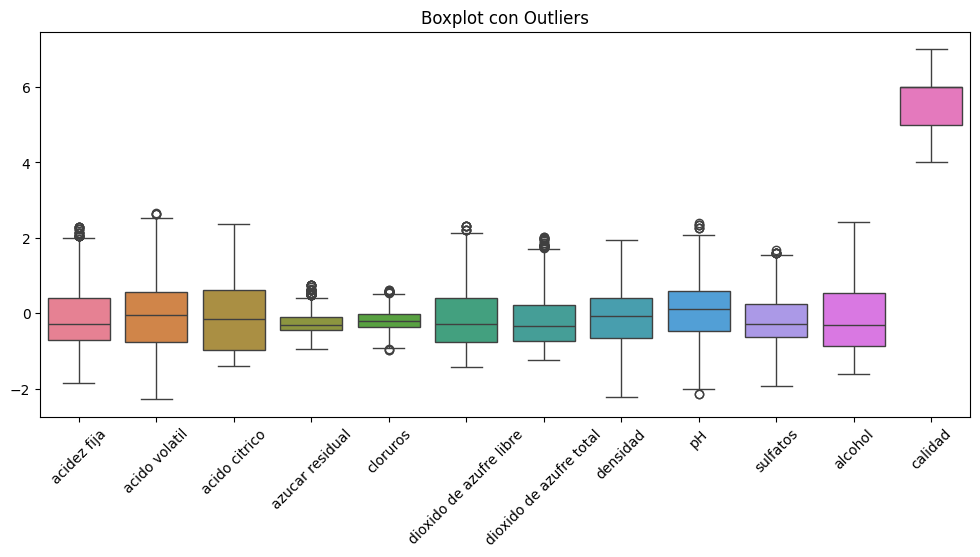

In [95]:
# Crear el boxplot con valores atípicos visibles
plt.figure(figsize=(12,5))
sns.boxplot(data=df_filtrado, showfliers=True)  # showfliers=True muestra los outliers

# Mostrar gráfico
plt.title("Boxplot con Outliers")
plt.xticks(rotation=45)
plt.show()

Por lo que se observa siguen habiendo datos fuera de los bigotes pero estan dentro del rango permitido al aplicar el rango intercuartílico (IQR)

### **3.6. División de datos para Entrenamiento/Testeo**

In [96]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [97]:
# Definir las variables independientes (features) y la variable objetivo (target) después de eliminar outliers
X = df_filtrado.drop(columns=["calidad"])  # Variables predictoras
y = df_filtrado["calidad"]  # Variable objetivo

# Separar en datos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver el tamaño de los conjuntos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)

Tamaño de X_train: (899, 11)
Tamaño de X_test: (225, 11)


Se utilizarán 899 datos para entrenamiento y 225 datos para testeo




## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


In [98]:
# Creamos un objeto de la clase LinearRegression
reg_mul = linear_model.LinearRegression()

# Entrenamos el modelo pasandole las variables independientes y dependiente
reg_mul.fit(X_train, y_train)

LinearRegression()

### **4.1. Coeficientes (pesos) del modelo**

In [99]:
# Obtener coeficientes del modelo entrenado
coeficientes = reg_mul.coef_

# Crear un DataFrame con los nombres de las características y sus coeficientes
df_coef = pd.DataFrame({"Feature": X_train.columns, "Coeficiente": coeficientes})

# Mostrar el DataFrame con los coeficientes
df_coef

,Feature,Coeficiente
0,acidez fija,0.055847
1,acido volatil,-0.166797
2,acido citrico,-0.096576
3,azucar residual,0.035770
4,cloruros,-0.050101
5,dioxido de azufre libre,0.040026
6,dioxido de azufre total,-0.089021
7,densidad,-0.027885
8,pH,-0.079122
9,sulfatos,0.295835


### **4.2. Evaluación de metricas en el set de entrenamiento y testeo**

In [100]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [101]:
# Predicciones en el set de entrenamiento y prueba
y_train_pred = reg_mul.predict(X_train)
y_test_pred = reg_mul.predict(X_test)

# Cálculo de R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Cálculo de MSE (Error cuadrático medio)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Cálculo de MAE (Error absoluto medio)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mostrar resultados
print(f"R² entrenamiento: {r2_train:.4f}")
print(f"R² test: {r2_test:.4f}")
print(f"MSE entrenamiento: {mse_train:.4f}")
print(f"MSE test: {mse_test:.4f}")
print(f"MAE entrenamiento: {mae_train:.4f}")
print(f"MAE test: {mae_test:.4f}")

R² entrenamiento: 0.3677
R² test: 0.3992
MSE entrenamiento: 0.3388
MSE test: 0.2836
MAE entrenamiento: 0.4650
MAE test: 0.4344



## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



### **5.2. Análisis de coeficientes:**

  - Coeficiente con features escaladas

*   acidez fija 0.055847
*   acido volatil -0.166797
*   acido citrico -0.096576
*   azucar residual 0.035770
*   cloruros -0.050101
*   dioxido de azufre libre 0.040026
*   dioxido de azufre total -0.089021
*   densidad -0.027885
*   pH -0.079122
*   sulfatos 0.295835
*   alcohol 0.283917

Se visualiza que tanto Sulfatos como Alcohol y la Acidez fija tienen un gran peso en la calidad del vino, no tan asi con el Azucar residual y Dioxido de azufre libre que aportan a la calidad del vino, pero en menores cantidades.

Se observa que hay bastantes valores negativos que le restan a la calidad del vino teniendo como principal variable el Acido volatil, seguido del Acido citrico.




### **5.3. Permutation Importance**

In [102]:
from sklearn.inspection import permutation_importance

In [103]:
# Calcular la importancia de las permutaciones con el conjunto de prueba
r = permutation_importance(reg_mul, X_test, y_test,
                           n_repeats=30,
                           random_state=42)

# Mostrar resultados ordenados por importancia
for i in r.importances_mean.argsort()[::-1]:  # Ordenar de mayor a menor impacto
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<20}"  # Mostrar el nombre de la feature
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

alcohol             0.296 +/- 0.042
sulfatos            0.181 +/- 0.027
acido volatil       0.098 +/- 0.024
pH                  0.020 +/- 0.009


Estos resultados de Permutation Importance indican qué variables tienen mayor impacto en la calidad del vino, según su efecto en el modelo cuando se alteran aleatoriamente.


## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  

Las variables mas importantes segun el modelo son el alcohol, sulfatos, acido volatil y ph.
Según mi análisis los valores mas importantes en la calidad del vino fue el alcohol y el sulfato, no considerando el ph por su bajo aporte a la calidad y el acido volatil que le resta a la calidad del vino.

   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  

Viendo el MSE y MAE del testeo se que una leve mejora en las predicciones disminuyendo el porcentaje de error, pero al analizar el R2 vemos que en el entrenamiento y testeo los valores son considerablemente bajos, por lo que estamos en presencia de underfitting.

Esto pude ser causado por haber demasiados datos atípico que estaban fuera del rango intercualtíl (IQR) *3 lo que redujo significativamente la cantidad de datos para generar el modelo


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

In [104]:
# Definir las características eliminando "azucar residual" y "densidad"
X = df_filtrado.drop(columns=["azucar residual", "densidad", "calidad"])  # Features
y = df_filtrado["calidad"]  # Target

# Separar en datos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver el tamaño de los conjuntos
print("Tamaño de X_train:", X_train2.shape)
print("Tamaño de X_test:", X_test2.shape)

Tamaño de X_train: (899, 9)
Tamaño de X_test: (225, 9)


In [105]:
# Creamos un objeto de la clase LinearRegression
reg_mul2 = linear_model.LinearRegression()

# Entrenamos el modelo pasandole las variables independientes y dependiente
reg_mul2.fit(X_train2, y_train2)

LinearRegression()

In [106]:
# Obtener coeficientes del modelo entrenado
coeficientes = reg_mul2.coef_

# Crear un DataFrame con los nombres de las características y sus coeficientes
df_coef2 = pd.DataFrame({"Feature": X_train2.columns, "Coeficiente": coeficientes})

# Mostrar el DataFrame con los coeficientes
df_coef2

,Feature,Coeficiente
0,acidez fija,0.036796
1,acido volatil,-0.168060
2,acido citrico,-0.097888
3,cloruros,-0.054195
4,dioxido de azufre libre,0.040057
5,dioxido de azufre total,-0.087935
6,pH,-0.089308
7,sulfatos,0.292084
8,alcohol,0.300421


In [107]:
# Predicciones en el set de entrenamiento y prueba
y_train_pred = reg_mul2.predict(X_train2)
y_test_pred = reg_mul2.predict(X_test2)

# Cálculo de R²
r2_train = r2_score(y_train2, y_train_pred)
r2_test = r2_score(y_test2, y_test_pred)

# Cálculo de MSE (Error cuadrático medio)
mse_train = mean_squared_error(y_train2, y_train_pred)
mse_test = mean_squared_error(y_test2, y_test_pred)

# Cálculo de MAE (Error absoluto medio)
mae_train = mean_absolute_error(y_train2, y_train_pred)
mae_test = mean_absolute_error(y_test2, y_test_pred)

# Mostrar resultados
print(f"R² entrenamiento: {r2_train:.4f}")
print(f"R² test: {r2_test:.4f}")
print(f"MSE entrenamiento: {mse_train:.4f}")
print(f"MSE test: {mse_test:.4f}")
print(f"MAE entrenamiento: {mae_train:.4f}")
print(f"MAE test: {mae_test:.4f}")

R² entrenamiento: 0.3675
R² test: 0.4000
MSE entrenamiento: 0.3389
MSE test: 0.2832
MAE entrenamiento: 0.4650
MAE test: 0.4341


Resultados modelo anterior

*   R² entrenamiento: 0.3677
*   R² test: 0.3992
*   MSE entrenamiento: 0.3388
*   MSE test: 0.2836
*   MAE entrenamiento: 0.4650
*   MAE test: 0.4344



---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).

- Se transformaron las features pero a causa de haber gran cantidad de outliers se redujeron considerablemente los datos para entrenar el modelo, no se pudieron salvar ya que al transformarlos y hacer un rango intercuartílico (IQR) considerando el tercer cuartil hubieron muchos valores fuera del bigote en en bloxpot, se creo de todas formas el modelo con esos outliers pero los errores en las predicciones eran de un 36% de error en el MSE y de 32% en el MAE dejando el R² en 0.2 siendo el valor muy bajo.


- Se borraron los outliers y al entrenar el modelo arrojo mejores resultados, pero el R² siguió bajo, llegando a la conclusión que se produjo un underfitting a causa del filtro de los outliers, dejando poca cantidad de datos para el entrenamiento del modelo.

- Se aplicó Permutation Importance para ver las variables mas importantes en el modelo, y se eliminaron las que no tenian mucha significancia para volver a entrenar el modelo, el cual mejoró su predicción pero mínimamente, no consiguiendo un modelo eficiente.

- Al Ver tantos valores dispersos y los resultados del modelo, se tendría que considerar probar con otro modelo como random forest, para su mejor clasificación.

# TP4 Regresión + MLP

2.1 Usar MLP con la librería MLP.

2.2 Presentar un caso donde la MLP sobreajuste.

2.3 Presentar un caso donde la MLP subajuste.

2.4 Presentar el caso donde cree que la MLP funciona de forma aceptable.

Tanto para 2.2, 2.3 y 2.4 deberá entrenar un modelo de red neuronal multicapa (MLP) con diferentes configuraciones de hiperparámetros.

Debe indicar las métricas de evaluación de los modelos e indicar como determina si sobreajusta (overfeatting) o si subajusta (underfitting)

In [108]:
from sklearn.neural_network import MLPRegressor # Importamos el modelo de red neuronal MLP para regresión
from sklearn.metrics import mean_squared_error, r2_score # Importamos métricas para evaluar el modelo

In [109]:
# Definir las variables independientes (features) y la variable objetivo (target) después de eliminar outliers
X = df_filtrado.drop(columns=["calidad"])  # Variables predictoras
y = df_filtrado["calidad"]  # Variable objetivo

# Separar en datos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver el tamaño de los conjuntos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)

Tamaño de X_train: (899, 11)
Tamaño de X_test: (225, 11)


In [110]:
# Escalar las features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelo de MLP sobreajustado

In [111]:
# Definir un MLP que sobreajuste
mlp_sobreajuste = MLPRegressor(
    hidden_layer_sizes=(300, 300, 300),  # Exceso de neuronas y capas
    activation='relu',  # Función de activación no lineal
    solver='adam',  # Optimizador eficiente
    alpha=1e-7,  # Regularización extremadamente baja (propenso a sobreajuste) alpha=1e-7 (equivalente a 0.0000001)
    max_iter=10000,  # Muchísimas iteraciones
    random_state=42
)

# Entrenar el modelo
mlp_sobreajuste.fit(X_train_scaled, y_train)

# Predicciones
y_train_pred = mlp_sobreajuste.predict(X_train_scaled)
y_test_pred = mlp_sobreajuste.predict(X_test_scaled)

# Evaluación de sobreajuste
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mostrar resultados de entenamiento
print("\nResultados del modelo MLP (sobreajustado) Entrenamiento:")
print(f"R² Entrenamiento: {r2_train:.4f}")
print(f"MSE Entrenamiento: {mse_train:.4f}")
print(f"MAE Entrenamiento: {mae_train:.4f}")

# Mostrar resultados de prueba
print("\nResultados del modelo MLP (sobreajustado) Testeo:")
print(f"R² Test: {r2_test:.4f}")
print(f"MSE Test: {mse_test:.4f}")
print(f"MAE Test: {mae_test:.4f}")

# Evaluación adicional para entender mejor el sobreajuste
print("\nDiferencias en error:")
print(f"Diferencia MSE (Train-Test): {mse_train - mse_test:.4f}")
print(f"Diferencia MAE (Train-Test): {mae_train - mae_test:.4f}")






Resultados del modelo MLP (sobreajustado) Entrenamiento:
R² Entrenamiento: 0.9773
MSE Entrenamiento: 0.0122
MAE Entrenamiento: 0.0782

Resultados del modelo MLP (sobreajustado) Testeo:
R² Test: 0.1104
MSE Test: 0.4199
MAE Test: 0.4877

Diferencias en error:
Diferencia MSE (Train-Test): -0.4077
Diferencia MAE (Train-Test): -0.4095


Se observa el modelo sobreajustados ya que en R2 de entrenamiento el modelo aprendio el 98% de los datos a comparación de R2 de testeo que fue de 11%, es una indicador que el modelo sobreajusto y que aprendio casi el 100% de los datos no dejando lugar a la generalización.

- MSE entrenamiento: 0.012 indica que el modelo predice con alta presición en entrenamiento.

- MAE entrenamiento: 0.078 El error medio absoluto dio muy bajo y es otro indicio de que el modelo esta sobreajustando excesivamente

El modelo anda muy bien con los datos de entrenamiento, por lo que arroja valores muy bueno.

- MSE testeo:0.4199 Mucho más alto que en entrenamiento, lo que sugiere que las predicciones son menos precisas con datos desconocidos.

- MAE testeo: 0.4877 Error absoluto significativamente mayor que en entrenamiento.

En conclusión el modelo no está generalizando bien. Aprende los datos de entrenamiento pero falla en predecir datos nuevos, se puede ver en la diferencia entre R2 train y R2 Test y MAE train y MAE test, donde los valores no deben tener mucha variabilidad entre train y test.

## Modelo de MLP subajustado

In [112]:
# Definir un MLP con alta regularización y muy pocas neuronas (subajuste)
mlp_subajuste = MLPRegressor(
    hidden_layer_sizes=(2,),  # Solo 2 neuronas en una capa (modelo muy simple)
    activation='relu',  # Activación estándar
    solver='adam',  # Optimizador eficiente
    alpha=1.0,  # Regularización muy alta (evita aprendizaje excesivo)
    max_iter=50,  # Pocas iteraciones (insuficiente para aprender bien)
    random_state=42
)

# Entrenar el modelo
mlp_subajuste.fit(X_train_scaled, y_train)

# Predicciones
y_train_pred = mlp_subajuste.predict(X_train_scaled)
y_test_pred = mlp_subajuste.predict(X_test_scaled)

# Evaluación de subajuste
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mostrar resultados de entrenamiento
print("\nResultados del modelo MLP (subajustado) Entrenamiento:")
print(f"R² Entrenamiento: {r2_train:.4f}")
print(f"MSE Entrenamiento: {mse_train:.4f}")
print(f"MAE Entrenamiento: {mae_train:.4f}")

# Mostrar resultados de prueba
print("\nResultados del modelo MLP (subajustado) Testeo:")
print(f"R² Test: {r2_test:.4f}")
print(f"MSE Test: {mse_test:.4f}")
print(f"MAE Test: {mae_test:.4f}")

# Evaluación adicional para entender mejor el subajuste
print("\nDiferencias en error:")
print(f"Diferencia MSE (Train-Test): {mse_train - mse_test:.4f}")
print(f"Diferencia MAE (Train-Test): {mae_train - mae_test:.4f}")



Resultados del modelo MLP (subajustado) Entrenamiento:
R² Entrenamiento: -56.8015
MSE Entrenamiento: 30.9680
MAE Entrenamiento: 5.3515

Resultados del modelo MLP (subajustado) Testeo:
R² Test: -61.3744
MSE Test: 29.4395
MAE Test: 5.1654

Diferencias en error:
Diferencia MSE (Train-Test): 1.5286
Diferencia MAE (Train-Test): 0.1861


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Se observa que el modelo subajustado no logra capturar correctamente los patrones de los datos, lo que se refleja en los valores extremadamente bajos y negativos de R² en entrenamiento y prueba.


- R2 Entrenamiento: -56.8015 Indica que el modelo no solo no está ajustando correctamente los datos de entrenamiento, sino que su desempeño es peor que cualquier modelo

- R2 Test: -61.3744 Peor aún, el modelo tiene un desempeño negativo en datos nuevos, lo que confirma que no logró aprender patrones relevantes y está completamente fallando en la tarea de regresión.

Conclusión sobre R2: Ambos valores indican un modelo extremadamente ineficiente, lo que confirma el subajuste.


- MSE Entrenamiento: 30.9680 Un error muy alto, lo que significa que las predicciones en entrenamiento están muy alejadas de los valores reales.

- MSE Test: 29.4395 Similarmente alto, lo que indica que el modelo no está aprendiendo nada útil y simplemente comete errores muy grandes en ambas fases.

Conclusión sobre MSE: El modelo no está mejorando su desempeño ni en datos conocidos ni en datos nuevos.


- MAE Entrenamiento: 5.3515 Un error promedio alto en entrenamiento, indicando que el modelo no logra predecir con precisión.

- MAE Test: 5.1654 Casi igual de alto en prueba, lo que confirma que el modelo no generaliza bien ni en datos de entrenamiento ni en nuevos datos.


En conclusión el modelo tiene un subajuste extremo, lo que significa que es incapaz de aprender patrones relevantes. Esto ocurre porque:
1. Demasiada regularización alpha=1.0 lo que evita que el modelo ajuste bien los pesos.
2. Muy pocas neuronas hidden_layer_sizes=(2,) no tiene suficiente capacidad para aprender relaciones.
3. Pocas iteraciones (max_iter=50) no tiene tiempo suficiente para mejorar su desempeño.

# Aplicación de GridSearch para ver los mejores hiperparámetros

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# Definir el modelo base
mlp = MLPRegressor(solver='adam', random_state=42)

# Definir los valores que queremos probar
parametros = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (50, 50), (100, 100)],  # Diferentes tamaños de capas
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Variaciones en regularización
    'max_iter': [500, 1000, 2000]  # Iteraciones para convergencia
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(mlp, parametros, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)


Mejores parámetros: {'alpha': 0.1, 'hidden_layer_sizes': (100,), 'max_iter': 1000}


# Modelo de MLP en forma aceptable

In [118]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Definir un MLP con parámetros equilibrados
mlp_aceptable = MLPRegressor(
    hidden_layer_sizes=(100,),  # Número moderado de neuronas y capas
    activation='relu',  # Función de activación no lineal
    solver='adam',  # Optimizador eficiente
    alpha=0.1,  # Regularización balanceada (ni demasiado baja ni alta)
    max_iter=1000,  # Iteraciones suficientes para aprender bien
    random_state=42
)

# Entrenar el modelo
mlp_aceptable.fit(X_train_scaled, y_train)

# Predicciones
y_train_pred = mlp_aceptable.predict(X_train_scaled)
y_test_pred = mlp_aceptable.predict(X_test_scaled)

# Evaluación del modelo
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Mostrar resultados de entrenamiento
print("\nResultados del modelo MLP (aceptable) Entrenamiento:")
print(f"R² Entrenamiento: {r2_train:.4f}")
print(f"MSE Entrenamiento: {mse_train:.4f}")
print(f"MAE Entrenamiento: {mae_train:.4f}")

# Mostrar resultados de prueba
print("\nResultados del modelo MLP (aceptable) Testeo:")
print(f"R² Test: {r2_test:.4f}")
print(f"MSE Test: {mse_test:.4f}")
print(f"MAE Test: {mae_test:.4f}")

# Evaluación adicional para verificar estabilidad
print("\nDiferencias en error:")
print(f"Diferencia MSE (Train-Test): {mse_train - mse_test:.4f}")
print(f"Diferencia MAE (Train-Test): {mae_train - mae_test:.4f}")



Resultados del modelo MLP (aceptable) Entrenamiento:
R² Entrenamiento: 0.6877
MSE Entrenamiento: 0.1673
MAE Entrenamiento: 0.3156

Resultados del modelo MLP (aceptable) Testeo:
R² Test: 0.3622
MSE Test: 0.3010
MAE Test: 0.4438

Diferencias en error:
Diferencia MSE (Train-Test): -0.1337
Diferencia MAE (Train-Test): -0.1282


- R2 Entrenamiento: 0.6877 Indica que el modelo captura aproximadamente el 69% de la variabilidad en los datos de entrenamiento. Aunque no es perfecto, tiene un desempeño aceptable.

- R2 Test: 0.3622 En prueba, el modelo explica solo el 36% de la variabilidad, lo que muestra que aún puede mejorar en la capacidad de generalización. Sin embargo, no es un caso de sobreajuste extremo.

Conclusión sobre R2 El modelo logra aprender de los datos de entrenamiento pero pierde precisión en prueba, lo que sugiere que todavía necesita ajustes para mejorar su rendimiento.


- MSE Entrenamiento: 0.1673 Indica que el modelo hace predicciones razonables en entrenamiento, con un nivel de error aceptable.

- MSE Test: 0.3010 Un poco más alto en prueba, pero sin ser extremadamente grande, lo que sugiere que el modelo puede generalizar en cierta medida pero aún tiene errores en datos nuevos.

Conclusión sobre MSE La diferencia entre entrenamiento y prueba no es abismal, pero el modelo todavía comete errores más altos en testeo.


- MAE Entrenamiento: 0.3156 Indica que el modelo tiene un error promedio bajo en entrenamiento.

- MAE Test: 0.4438 Un poco más alto en prueba, pero aún dentro de un rango aceptable.

Conclusión sobre MAE Si bien el modelo presenta más error en testeo, no es una diferencia extrema, lo que sugiere que el rendimiento es aceptable pero mejorable.

Por otra parte al utilizar los parametros arrojados por GridSearch, el modelo mejoró notoriamente, pero inicialmente al ser un modelo de clasificación y no regresión, los resultados son mediocres.